<a href="https://colab.research.google.com/github/rayhankwarta/analisis_video_game_global_kaggle/blob/main/Analisis_Penjualan_Video_Game_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "gregorut/videogamesales",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-6731088.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.dropna(subset=['Year', 'Publisher'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Name: count, dtype: int64


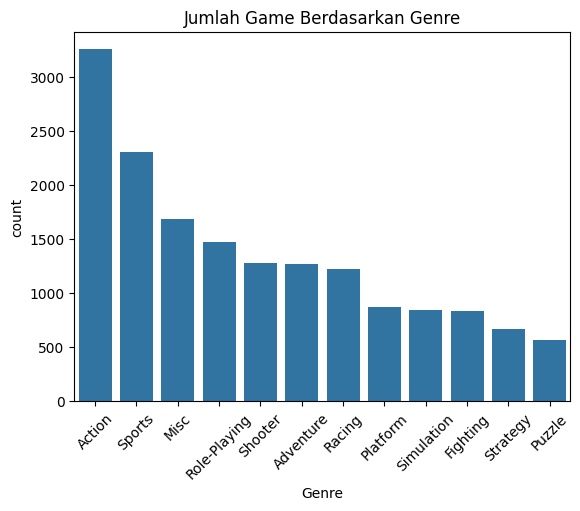

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat 10 genre yang paling banyak muncul
print(df['Genre'].value_counts().head(10))

# Visualisasi dengan Bar Chart
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Jumlah Game Berdasarkan Genre')
plt.xticks(rotation=45)
plt.show()

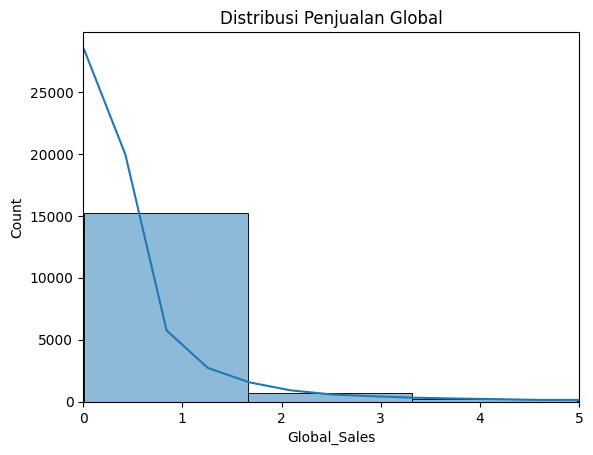

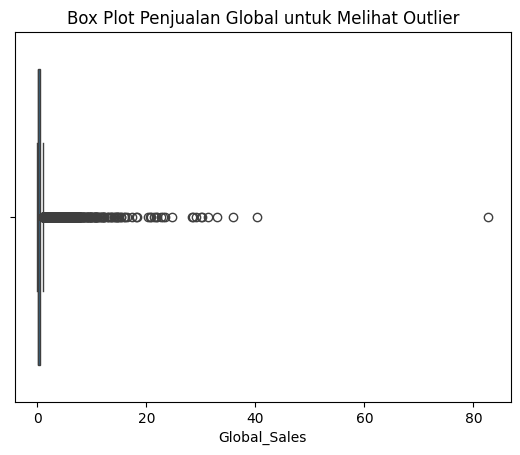

In [16]:
# Melihat distribusi penjualan global dengan Histogram
plt.figure()
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribusi Penjualan Global')
plt.xlim(0, 5)
plt.show()

# Melihat outlier dengan Box Plot
plt.figure()
sns.boxplot(x=df['Global_Sales'])
plt.title('Box Plot Penjualan Global untuk Melihat Outlier')
plt.show()

Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64


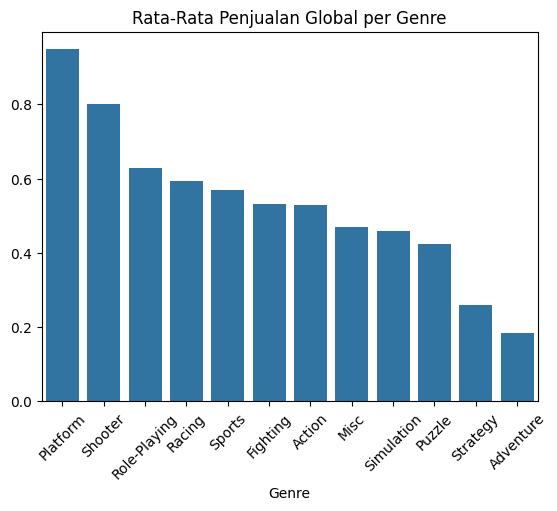

In [17]:
# Melihat rata-rata penjualan per genre
genre_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print(genre_sales)

# Visualisasi dengan Bar Chart
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Rata-Rata Penjualan Global per Genre')
plt.xticks(rotation=45)
plt.show()

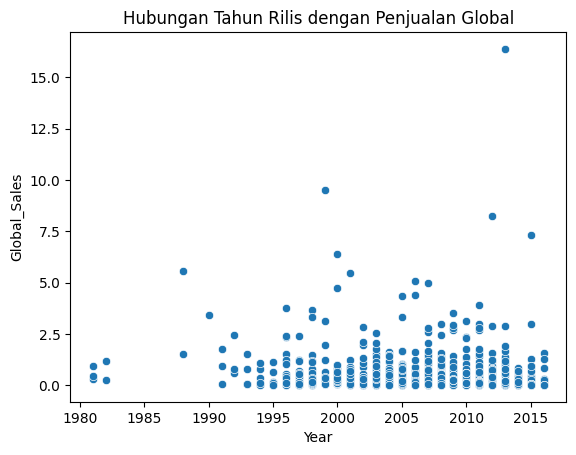

In [18]:
# Melihat hubungan tahun rilis dengan penjualan global
# Kita ambil sampel 1000 data agar plot tidak terlalu padat
sample_df = df.sample(n=1000)
sns.scatterplot(x='Year', y='Global_Sales', data=sample_df)
plt.title('Hubungan Tahun Rilis dengan Penjualan Global')
plt.show()

                        Name Platform  Global_Sales
0                 Wii Sports      Wii         82.74
1          Super Mario Bros.      NES         40.24
2             Mario Kart Wii      Wii         35.82
3          Wii Sports Resort      Wii         33.00
4   Pokemon Red/Pokemon Blue       GB         31.37
5                     Tetris       GB         30.26
6      New Super Mario Bros.       DS         30.01
7                   Wii Play      Wii         29.02
8  New Super Mario Bros. Wii      Wii         28.62
9                  Duck Hunt      NES         28.31


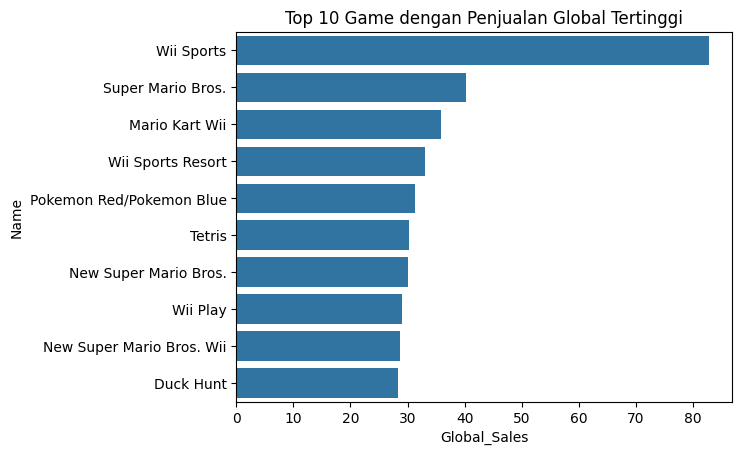

In [19]:
top_10_games = df.nlargest(10, 'Global_Sales')
print(top_10_games[['Name', 'Platform', 'Global_Sales']])

# Visualisasi
sns.barplot(x='Global_Sales', y='Name', data=top_10_games)
plt.title('Top 10 Game dengan Penjualan Global Tertinggi')
plt.show()

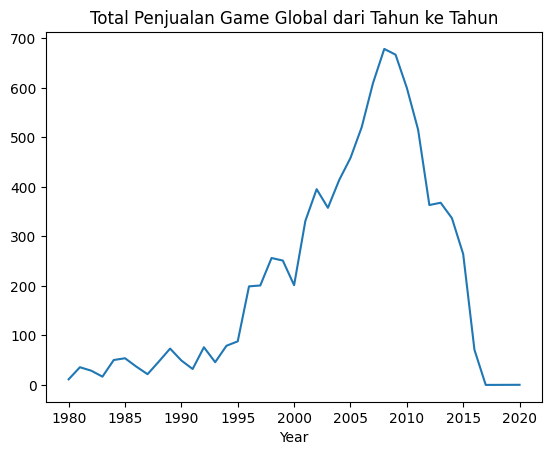

In [20]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Visualisasi dengan Line Plot
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Penjualan Game Global dari Tahun ke Tahun')
plt.show()

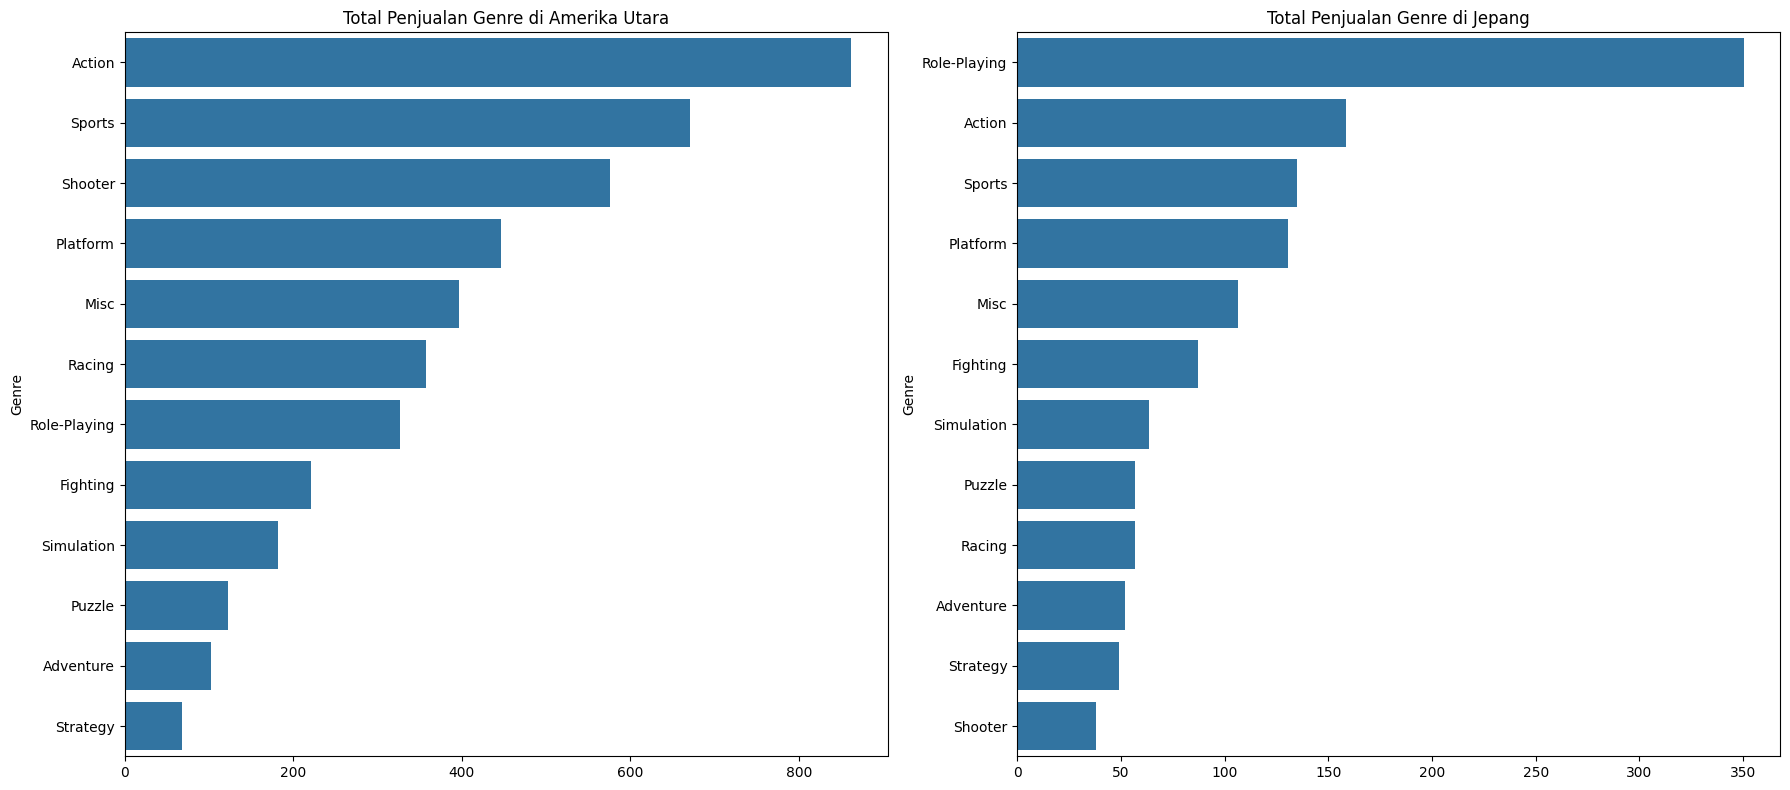

In [21]:
# Menghitung total penjualan per genre untuk setiap wilayah
na_genre_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
jp_genre_sales = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

# Membuat 2 plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot untuk Amerika Utara
sns.barplot(ax=axes[0], x=na_genre_sales.values, y=na_genre_sales.index)
axes[0].set_title('Total Penjualan Genre di Amerika Utara')

# Plot untuk Jepang
sns.barplot(ax=axes[1], x=jp_genre_sales.values, y=jp_genre_sales.index)
axes[1].set_title('Total Penjualan Genre di Jepang')

plt.tight_layout()
plt.show()